In [1]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras

#Load Data

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Nomor4/USD_INR.csv', index_col='Date')
dataset.index = pd.to_datetime(dataset.index)
dataset = dataset.sort_index()
print(dataset)

             Price    Open    High     Low  Change %
Date                                                
1980-01-02   8.000   8.000   8.000   8.000      0.00
1980-01-03   7.950   7.950   7.950   7.950     -0.63
1980-01-04   8.050   8.050   8.050   8.050      1.26
1980-01-07   8.050   8.050   8.050   8.050      0.00
1980-01-08   8.050   8.050   8.050   8.050      0.00
...            ...     ...     ...     ...       ...
2017-08-04  63.675  63.670  63.786  63.572     -0.05
2017-08-07  63.840  63.710  63.865  63.648      0.26
2017-08-08  63.692  63.750  63.785  63.615     -0.23
2017-08-09  63.860  63.780  63.860  63.710      0.26
2017-08-10  64.165  63.898  64.175  63.855      0.48

[9697 rows x 5 columns]


#split data

In [3]:
data = dataset.filter(['Price'])
dataset = data.values

In [13]:
split= int(len(dataset) * 0.8)
train_dataset = dataset[: split]
test_dataset = dataset[split + 1:]
scaler = MinMaxScaler()
feature = scaler.fit_transform(dataset)

In [6]:
train_data = feature[: split, :]
x_train = []
y_train = []

for i in range(10, len(train_data)):
  x_train.append(train_data[i-10 : i, 0])
  y_train.append(train_data[i,0])

# Reshape

In [7]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build Model

In [8]:
model = keras.Sequential()
model.add(keras.layers.LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(keras.layers.LSTM(50, return_sequences=False))
model.add(keras.layers.Dense(25))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))

In [9]:
model.fit(x_train,y_train, batch_size = 3, epochs=2)

Epoch 1/2
2583/2583 [==============================] - 29s 10ms/step - loss: 0.0025
Epoch 2/2
2583/2583 [==============================] - 26s 10ms/step - loss: 9.9158e-05


# Test data

In [10]:
test_data = feature[split-10:, :]
x_test = []
y_test = feature[split:, :]
print(len(test_data))

for i in range(10, len(test_data)):
  x_test.append(test_data[i-10: i, 0])

1950


In [11]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)
rmse = np.sqrt(np.mean(pred - y_test)**2)

# Plot the data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


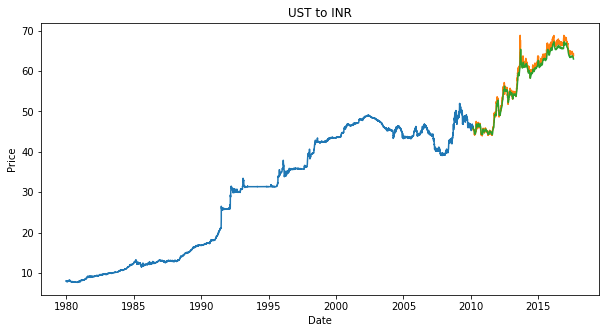

In [17]:
train_temp = data[: split]
data_temp = data[split:]
data_temp['Prediction'] = pred

plt.figure(figsize=(10, 5))
plt.title("UST to INR")
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(train_temp['Price'])
plt.plot(data_temp[['Price', 'Prediction']])